<a href="https://colab.research.google.com/github/ashouy/Aprendizado-de-Maquina/blob/main/Atividade02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base para predição do custo de uma consulta médica

> ## Metadata
* O valor da consulta no final está em rúpia indiana IRN

### **Apresentação da base**

In [30]:
import pandas as pd

consultas = pd.read_excel('https://github.com/ashouy/Aprendizado-de-Maquina/blob/main/bases/consultation_fee/train.xlsx?raw=true')
consultas

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


### **Tratamento**


#### Seleção de colunas

>* seleção de colunas

In [31]:
## verificando as colunas que tem valores não definidos
hasNan = consultas.isnull().sum()
print(hasNan)

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


In [ ]:
## verificando quantos valores possíveis a coluna "qualificationn tem"
consultas["Qualification"].describe()

count     5961
unique    1420
top        BDS
freq       488
Name: Qualification, dtype: object

In [ ]:
consultas["Profile"].describe()

count        5961
unique          6
top       Dentist
freq         1397
Name: Profile, dtype: object

>* A coluna Misscellaneous_info não apresenta dados constantes, ou que respeitam algum padrão, impossibilitando de realizar alguma conversão para dado numérico, e dificultando a análize

>* A coluna "rating" tem 3302 dados faltantes, mais da metade do exemplos, não há possibilidade de preencher com médias ou valores fixos como na coluna "place", que tem apenas 25 exemplos com valores não definidos

>* A coluna "qualification" apresenta 1420 possibilidades, podem dizer a mesma coisa, pois existem exemplos que tem a qualificação diferente porém o perfil ("profile") igual. Podemos observar acima que a coluna "Qualification" tem 1420 valores unicos e a "Profile" tem apenas 6.

>* Conclusão: serão removidas as coluans "rating", "miscellaneous_Info" e "Profile"

In [32]:
consultas = consultas[["Experience",	"Place", "Profile",	"Fees"]]
consultas

,Experience,Place,Profile,Fees
0,24 years experience,"Kakkanad, Ernakulam",Homeopath,100
1,12 years experience,"Whitefield, Bangalore",Ayurveda,350
2,9 years experience,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,12 years experience,"Bannerghatta Road, Bangalore",Ayurveda,250
4,20 years experience,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...
5956,19 years experience,"Basavanagudi, Bangalore",ENT Specialist,300
5957,33 years experience,"Nungambakkam, Chennai",General Medicine,100
5958,41 years experience,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,15 years experience,"Vileparle West, Mumbai",General Medicine,100


### Alterar tipo das colunas

In [33]:
#mudar tipo da experiencia
exp_column_int = consultas['Experience'].str[:2].astype(int)
consultas['Experience'] = exp_column_int
consultas["Experience"].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([24, 12,  9, 20,  8, 42, 10, 14, 23,  5,  7, 21, 19, 41, 31, 25, 16,
       15, 11, 22, 38,  6, 36, 13, 18, 46, 40, 49, 33,  0, 27, 30, 52, 60,
       26, 35, 34, 39, 32, 17, 28, 58,  4, 45, 44,  3, 37, 50, 29, 43, 54,
       66,  2, 51, 47, 48, 53, 56, 61, 59, 57, 55, 65, 64])

In [34]:
consultas_base = consultas
consultas_base.head()

,Experience,Place,Profile,Fees
0,24,"Kakkanad, Ernakulam",Homeopath,100
1,12,"Whitefield, Bangalore",Ayurveda,350
2,9,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,12,"Bannerghatta Road, Bangalore",Ayurveda,250
4,20,"Keelkattalai, Chennai",Ayurveda,250


In [13]:
## mudar tipo do profile

profile_types = pd.get_dummies(consultas['Profile'], prefix='spec_')
profile_types

,spec__Ayurveda,spec__Dentist,spec__Dermatologists,spec__ENT Specialist,spec__General Medicine,spec__Homeopath
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
5956,0,0,0,1,0,0
5957,0,0,0,0,1,0
5958,0,0,0,0,1,0
5959,0,0,0,0,1,0


In [14]:
# Juntar profile dummies com dataset
consultas = profile_types.join(consultas.drop(columns=["Profile"]))
consultas.head()



,spec__Ayurveda,spec__Dentist,spec__Dermatologists,spec__ENT Specialist,spec__General Medicine,spec__Homeopath,Experience,Place,Fees
0,0,0,0,0,0,1,24,"Kakkanad, Ernakulam",100
1,1,0,0,0,0,0,12,"Whitefield, Bangalore",350
2,0,0,0,1,0,0,9,"Mathikere - BEL, Bangalore",300
3,1,0,0,0,0,0,12,"Bannerghatta Road, Bangalore",250
4,1,0,0,0,0,0,20,"Keelkattalai, Chennai",250


In [35]:

consultas_base.head()

,Experience,Place,Profile,Fees
0,24,"Kakkanad, Ernakulam",Homeopath,100
1,12,"Whitefield, Bangalore",Ayurveda,350
2,9,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,12,"Bannerghatta Road, Bangalore",Ayurveda,250
4,20,"Keelkattalai, Chennai",Ayurveda,250


In [39]:
consultas_aux = consultas_base.drop(columns={'Place'})
consultas_aux.head()

,Experience,Profile,Fees
0,24,Homeopath,100
1,12,Ayurveda,350
2,9,ENT Specialist,300
3,12,Ayurveda,250
4,20,Ayurveda,250


In [40]:
new_places = novaColunaPlace.to_frame()
new_places.head()

,Place
0,Ernakulam
1,Bangalore
2,Bangalore
3,Bangalore
4,Chennai


In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(consultas_aux2['Place'])
le2 = LabelEncoder()
le2.fit(consultas_aux2['Profile'])

LabelEncoder()

In [44]:
le.classes_

array(['Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam',
       'Hyderabad', 'Mumbai', 'Sector 5', 'Thiruvananthapuram'],
      dtype=object)

In [45]:
le2.classes_

array(['Ayurveda', 'Dentist', 'Dermatologists', 'ENT Specialist',
       'General Medicine', 'Homeopath'], dtype=object)

In [46]:
consultas_aux2['Place'] = le.transform(consultas_aux2['Place'])
consultas_aux2['Profile'] = le2.transform(consultas_aux2['Profile'])

In [56]:
consultas_aux2['Place'].unique()

array([4, 0, 1, 3, 5, 2, 6, 8, 7])

In [57]:
consultas_aux2['Profile'].unique()

array([5, 0, 3, 1, 4, 2])

In [52]:
import seaborn as sb
corr = consultas_aux2[['Experience','Profile',	'Experience',	'Place']].corr()

In [27]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
predictedCV = cross_val_predict(LinearRegression(),dff.drop(columns=['Fees']) , dff['Fees'], cv=10)

>* O local específico da consulta varia muito, e acreditamos que dependendo de onde a consulta for feita, o preço será diferente. Como existem diversos "bairros", nos restringimos as cidades. Para isso fizemos uma função para retornar apenas as cidades

In [36]:
# Alterando tipo da coluna "Place"

#funcão para retornar apenas a cidade
def convert_place_to_city(places):
  only_city = str(places)
  if ", " in only_city:
    pop = only_city.split(', ')
    return pop[1]
  else:
    return 'Bangalore'
    
## mais a frente poderemos perceber que Bangalore é a cidade mais presente, com isso colocaremos os 25
## exemplos que não tem cidade definida para ser igual a "bangalore", pois há um probabilidade maior de acertar,
## além de que apenas 25 num dataset com 5960 exemplos não terão impacto relevante.


In [37]:
# Aplicando a função
novaColunaPlace= consultas['Place'].apply(convert_place_to_city)
novaColunaPlace


0       Ernakulam
1       Bangalore
2       Bangalore
3       Bangalore
4         Chennai
          ...    
5956    Bangalore
5957      Chennai
5958        Delhi
5959       Mumbai
5960        Delhi
Name: Place, Length: 5961, dtype: object

In [38]:
novaColunaPlace.value_counts()


Bangalore             1284
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Sector 5                 1
Name: Place, dtype: int64

>* como podemos ver acima, Bangalore é a cidade mais presente, mesmo sem os 25 exemplos adicionados a ela

In [ ]:
## Convertendo para int (dummies)
dummies_places = pd.get_dummies(novaColunaPlace, prefix='city_')
dummies_places

,city__Bangalore,city__Chennai,city__Coimbatore,city__Delhi,city__Ernakulam,city__Hyderabad,city__Mumbai,city__Sector 5,city__Thiruvananthapuram
0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0
5957,0,1,0,0,0,0,0,0,0
5958,0,0,0,1,0,0,0,0,0
5959,0,0,0,0,0,0,1,0,0


In [ ]:
consultas = dummies_places.join(consultas.drop(columns=["Place"]))

In [ ]:
consultas.head()

,city__Bangalore,city__Chennai,city__Coimbatore,city__Delhi,city__Ernakulam,city__Hyderabad,city__Mumbai,city__Sector 5,city__Thiruvananthapuram,spec__Ayurveda,spec__Dentist,spec__Dermatologists,spec__ENT Specialist,spec__General Medicine,spec__Homeopath,Experience,Fees
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,24,100
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,350
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,300
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,250
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,20,250


In [ ]:
consultas_base = consultas
consultas_base

,city__Bangalore,city__Chennai,city__Coimbatore,city__Delhi,city__Ernakulam,city__Hyderabad,city__Mumbai,city__Sector 5,city__Thiruvananthapuram,spec__Ayurveda,spec__Dentist,spec__Dermatologists,spec__ENT Specialist,spec__General Medicine,spec__Homeopath,Experience,Fees
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,24,100
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,350
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,300
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,250
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,20,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,19,300
5957,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,33,100
5958,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,41,600
5959,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,15,100


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
consultas_base.to_csv('./consultasTratadas.csv', index = False,)
#df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)

# Aplicação dos algoritmos

In [1]:
import pandas as pd

base_tratada = pd.read_csv('https://raw.githubusercontent.com/ashouy/Aprendizado-de-Maquina/main/bases/consultation_fee/consultasTratadas.csv')
base_tratada.head()

,city__Bangalore,city__Chennai,city__Coimbatore,city__Delhi,city__Ernakulam,city__Hyderabad,city__Mumbai,city__Sector 5,city__Thiruvananthapuram,spec__Ayurveda,spec__Dentist,spec__Dermatologists,spec__ENT Specialist,spec__General Medicine,spec__Homeopath,Experience,Fees
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,24,100
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,350
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,300
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,250
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,20,250


In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

predictedCV = cross_val_predict(LinearRegression(),base_tratada.drop(columns=['Fees']) , base_tratada['Fees'], cv=10)

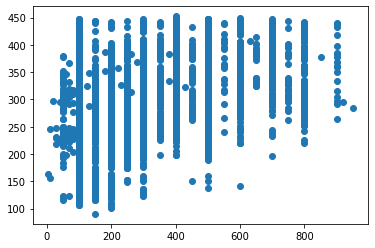

In [8]:
import matplotlib.pyplot as plt
plt.scatter(base_tratada['Fees'], predictedCV)

## Importações necessárias

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression

## Classe runregression

Para executar validação cruzada e obter a média e desvio padrão das métricas (MAE, MSE, RMSE e R2)

In [24]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import metrics

class runregression:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: quantidade de folds da validação cruzada

    Guarda as métricas de cada execução em resultados e 
    Mostra os valores médios com desvio padrão para as métricas (mostraresultadomedio)   
  '''

  def __init__(self, X, y, model, cv = 5):
    
    self.__resultados = {
      'MAE': [],
      'MSE': [],
      'RMSE': [],
      'R2': []
    }

    print(f'validação cruzada com {cv} folds')
    self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    kf = KFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in kf.split(X, y):
      model.fit(X.iloc[train_index], y.iloc[train_index])
      pred = model.predict(X.iloc[test_index])
      self.__resultados['MAE'].append(metrics.mean_absolute_error(y[test_index], pred))
      self.__resultados['MSE'].append(metrics.mean_squared_error(y[test_index], pred))
      self.__resultados['RMSE'].append(np.sqrt(metrics.mean_squared_error(y[test_index], pred)))
      self.__resultados['R2'].append(metrics.r2_score(y[test_index], pred))

  def mostraresultadomedio(self):
    print(f"MAE: {np.mean(self.__resultados['MAE']):.2f} +- {np.std(self.__resultados['MAE']):.2f}")
    print(f"MSE: {np.mean(self.__resultados['MSE']):.2f} +- {np.std(self.__resultados['MSE']):.2f}")
    print(f"RMSE: {np.mean(self.__resultados['RMSE']):.2f} +- {np.std(self.__resultados['RMSE']):.2f}")
    print(f"R2: {np.mean(self.__resultados['R2']):.2f} +- {np.std(self.__resultados['R2']):.2f}")

### Linear Regression

In [ ]:
# Erro ao executar regressão linear simples
cross_validation_RL = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], LinearRegression(), cv = 10)
cross_validation_RL.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 140.61 +- 3.97
MSE: 31093.77 +- 1689.62
RMSE: 176.27 +- 4.83
R2: 0.15 +- 0.02


### KNN regressor

Na regressão, o KNN calcula a média dos k vizinhos mais próximos (**média simples ou poderada**) para o novo exemplo


In [ ]:
# cross_validation_RL = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], LinearRegression(), cv = 10)
# cross_validation_RL.mostraresultadomedio()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], test_size=0.33)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

#define os parâmetros a serem testados com o KNN
param_grid_knn = {'n_neighbors': range(1,40,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
#cria o objeto do gridsearchcv
gridknn = GridSearchCV(KNeighborsRegressor(), param_grid_knn,  cv = 10, verbose = 1) 
#executa o gridsearchcv para a base separando X e y
gridknn.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   43.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
gridknn.best_params_

{'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}

## Teste com os melhores parâmetros

In [ ]:
pred = gridknn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 142.35331978319786
MSE: 32233.922846476406
RMSE: 179.5380818836951
R2: 0.10853404498502639


In [ ]:
knn = gridknn.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_knn = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], knn, cv = 10)
cross_validation_knn.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 141.52 +- 2.36
MSE: 31606.63 +- 992.23
RMSE: 177.76 +- 2.80
R2: 0.13 +- 0.03


### SVM regressor

Na regressão, o SVM busca pelo hiperplano que se ajuste aos dados, tentando maximizar a margem, **evitando que o modelo fique superajustado aos dados de treino**

#### Escolha dos melhores parâmetros com GridSearchCV


In [ ]:
from sklearn.svm import SVR

param_grid_svm = {
    'C': [1, 10, 100], 
    'gamma': ['auto', 'scale'], 
    'kernel': ['rbf', 'sigmoid']
} 
gridsvm = GridSearchCV(SVR(),param_grid_svm, verbose = 3)
gridsvm.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=auto, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.010, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.009, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.017, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.014, total=   1.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.029, total=   1.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, gamma=auto, kernel=sigmoid, score=-0.028, total=   1.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, gamma=auto, kernel=sigmoid, score=-0.112, total=   1.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, gamma=auto, kernel=sigmoid, score=-0.026, total=   1.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, gamma=auto, kernel=sigmoid, score=-0.008, total=   1.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
gridsvm.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

### Escolha do melhores parâmetros para o SVM

In [ ]:
pred = gridsvm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 137.00707240979554
MSE: 32858.15315037703
RMSE: 181.26818019271067
R2: 0.09018587368157249


### Validação Cruzada com runregression para o SVM

In [ ]:
svm = gridsvm.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_svm = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], svm, cv = 10)
cross_validation_svm.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 134.18 +- 4.46
MSE: 31548.45 +- 1782.65
RMSE: 177.55 +- 5.05
R2: 0.13 +- 0.04


### MLP regressor

####Escolha dos melhores parâmetros com GridSearchCV


In [ ]:
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'hidden_layer_sizes': [(100, ), (13,)], #default e heurístico
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [5000, 10000]
}

gridmlp = GridSearchCV(MLPRegressor(),param_grid_mlp, verbose = 1)
gridmlp.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reach

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['identity', '

#### Teste com os melhores parâmetros




In [ ]:
pred = gridmlp.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 135.42182666291123
MSE: 30100.930266776024
RMSE: 173.49619669253855
R2: 0.16752439115414974


### Validação Cruzada com runregression para o MLP

In [ ]:
mlp = gridmlp.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_mlp = runregression(base_tratada.drop(columns={'Fees'}), base_tratada['Fees'], mlp, cv = 10)
cross_validation_mlp.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 135.47 +- 4.18
MSE: 29749.61 +- 1863.60
RMSE: 172.40 +- 5.40
R2: 0.18 +- 0.02


#Conclusão

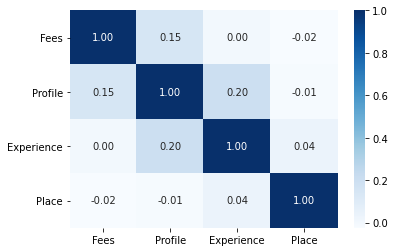

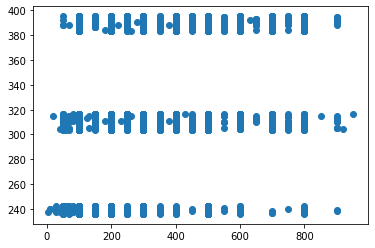

In [28]:
import matplotlib.pyplot as plt
plt.scatter(dff['Fees'], predictedCV)

In [42]:
consultas_aux2 = consultas_aux.join(new_places, )
consultas_aux2.head()

,Experience,Profile,Fees,Place
0,24,Homeopath,100,Ernakulam
1,12,Ayurveda,350,Bangalore
2,9,ENT Specialist,300,Bangalore
3,12,Ayurveda,250,Bangalore
4,20,Ayurveda,250,Chennai


In [47]:
consultas_aux2

,Experience,Profile,Fees,Place
0,24,5,100,4
1,12,0,350,0
2,9,3,300,0
3,12,0,250,0
4,20,0,250,1
...,...,...,...,...
5956,19,3,300,0
5957,33,4,100,1
5958,41,4,600,3
5959,15,4,100,6


In [29]:
cross_validation_RL = runregression(dff.drop(columns={'Fees'}), dff['Fees'], LinearRegression(), cv = 10)
cross_validation_RL.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 145.81 +- 3.29
MSE: 32701.84 +- 1673.50
RMSE: 180.78 +- 4.57
R2: 0.10 +- 0.01
